In [22]:
from sklearn.metrics import mean_squared_error
import pandas as pd
import random

%load_ext nb_black


The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [3]:
random.seed(0)

with open("missing_values_signals_69435_10.csv", "w") as f:
    with open("signals_69435.csv") as infile:
        for line in infile:
            if random.random() > 0.1:
                f.write(line)

In [4]:
random.seed(0)

with open("missing_values_signals_69435_20.csv", "w") as f:
    with open("signals_69435.csv") as infile:
        for line in infile:
            if random.random() > 0.2:
                f.write(line)

In [5]:
random.seed(0)

with open("missing_values_signals_69435_40.csv", "w") as f:
    with open("signals_69435.csv") as infile:
        for line in infile:
            if random.random() > 0.4:
                f.write(line)

In [10]:
df_original = pd.read_csv("signals_69435.csv", header=None, names=["time", "HR", "ABPSys", "ABPDias", "ABPMean", "RESP", "SpO2"])
df_original = df_original[["time", "RESP"]]

In [11]:
df_linear_10 = pd.read_csv("interpolation_linear_10.csv", header=None, names=["time", "label", "RESP"], index_col=False)
df_linear_20 = pd.read_csv("interpolation_linear_20.csv", header=None, names=["time", "label", "RESP"], index_col=False)
df_linear_40 = pd.read_csv("interpolation_linear_40.csv", header=None, names=["time", "label", "RESP"], index_col=False)
df_linear_10 = df_linear_10[["time", "RESP"]]
df_linear_20 = df_linear_20[["time", "RESP"]]
df_linear_40 = df_linear_40[["time", "RESP"]]
df_spline_10 = pd.read_csv("interpolation_spline_10.csv", header=None, names=["time", "label", "RESP"], index_col=False)
df_spline_20 = pd.read_csv("interpolation_spline_20.csv", header=None, names=["time", "label", "RESP"], index_col=False)
df_spline_40 = pd.read_csv("interpolation_spline_40.csv", header=None, names=["time", "label", "RESP"], index_col=False)
df_spline_10 = df_spline_10[["time", "RESP"]]
df_spline_20 = df_spline_20[["time", "RESP"]]
df_spline_40 = df_spline_40[["time", "RESP"]]
df_locf_10 = pd.read_csv("interpolation_locf_10.csv", header=None, names=["time", "label", "RESP"], index_col=False)
df_locf_20 = pd.read_csv("interpolation_locf_20.csv", header=None, names=["time", "label", "RESP"], index_col=False)
df_locf_40 = pd.read_csv("interpolation_locf_40.csv", header=None, names=["time", "label", "RESP"], index_col=False)
df_locf_10 = df_locf_10[["time", "RESP"]]
df_locf_20 = df_locf_20[["time", "RESP"]]
df_locf_40 = df_locf_40[["time", "RESP"]]
df_nocb_10 = pd.read_csv("interpolation_nocb_10.csv", header=None, names=["time", "label", "RESP"], index_col=False)
df_nocb_20 = pd.read_csv("interpolation_nocb_20.csv", header=None, names=["time", "label", "RESP"], index_col=False)
df_nocb_40 = pd.read_csv("interpolation_nocb_40.csv", header=None, names=["time", "label", "RESP"], index_col=False)
df_nocb_10 = df_nocb_10[["time", "RESP"]]
df_nocb_20 = df_nocb_20[["time", "RESP"]]
df_nocb_40 = df_nocb_40[["time", "RESP"]]

In [12]:
df_linear_10.drop(index=[0,1,2,3,4167,4168,4169,4170], inplace=True)
df_linear_20.drop(index=[0,1,2,3,4167,4168,4169,4170], inplace=True)
df_linear_40.drop(index=[0,1,2,3,4167,4168,4169,4170], inplace=True)
df_spline_10.drop(index=[0,1,2,3,4167,4168,4169,4170], inplace=True)
df_spline_20.drop(index=[0,1,2,3,4167,4168,4169,4170], inplace=True)
df_spline_40.drop(index=[0,1,2,3,4167,4168,4169,4170], inplace=True)
df_locf_10.drop(index=[0,1,2,3,4167,4168,4169,4170], inplace=True)
df_locf_20.drop(index=[0,1,2,3,4167,4168,4169,4170], inplace=True)
df_locf_40.drop(index=[0,1,2,3,4167,4168,4169,4170], inplace=True)
df_nocb_10.drop(index=[0,1,2,3,4167,4168,4169,4170], inplace=True)
df_nocb_20.drop(index=[0,1,2,3,4167,4168,4169,4170], inplace=True)
df_nocb_40.drop(index=[0,1,2,3,4167,4168,4169,4170], inplace=True)

In [5]:
df_original

,time,RESP
0,15:27:56 20/09/2108,0.0
1,15:28:56 20/09/2108,0.0
2,15:29:56 20/09/2108,0.0
3,15:30:56 20/09/2108,0.0
4,15:31:56 20/09/2108,0.0
...,...,...
4158,12:45:56 23/09/2108,0.0
4159,12:46:56 23/09/2108,0.0
4160,12:47:56 23/09/2108,0.0
4161,12:48:56 23/09/2108,0.0


In [13]:
mse_linear_10 = mean_squared_error(df_original["RESP"], df_linear_10["RESP"], squared=False)
mse_linear_20 = mean_squared_error(df_original["RESP"], df_linear_20["RESP"], squared=False)
mse_linear_40 = mean_squared_error(df_original["RESP"], df_linear_40["RESP"], squared=False)
mse_spline_10 = mean_squared_error(df_original["RESP"], df_spline_10["RESP"], squared=False)
mse_spline_20 = mean_squared_error(df_original["RESP"], df_spline_20["RESP"], squared=False)
mse_spline_40 = mean_squared_error(df_original["RESP"], df_spline_40["RESP"], squared=False)
mse_locf_10 = mean_squared_error(df_original["RESP"], df_locf_10["RESP"], squared=False)
mse_locf_20 = mean_squared_error(df_original["RESP"], df_locf_20["RESP"], squared=False)
mse_locf_40 = mean_squared_error(df_original["RESP"], df_locf_40["RESP"], squared=False)
mse_nocb_10 = mean_squared_error(df_original["RESP"], df_nocb_10["RESP"], squared=False)
mse_nocb_20 = mean_squared_error(df_original["RESP"], df_nocb_20["RESP"], squared=False)
mse_nocb_40 = mean_squared_error(df_original["RESP"], df_nocb_40["RESP"], squared=False)

In [14]:
print(mse_linear_10)
print(mse_linear_20)
print(mse_linear_40)
print(mse_spline_10)
print(mse_spline_20)
print(mse_spline_40)
print(mse_locf_10)
print(mse_locf_20)
print(mse_locf_40)
print(mse_nocb_10)
print(mse_nocb_20)
print(mse_nocb_40)

0.4929198566663836
0.6686093303817817
1.0099120317341193
0.528453493502756
0.8001621596231201
2.62005247003401
0.5683569995313548
0.7978766882322134
1.564406421324484
0.5727238929518256
0.8469514168822446
2.1282442517218763


In [25]:
df_locf["RESP"].head(189)

4       0.000000
5       0.000000
6       0.000000
7       0.000000
8       0.000000
         ...    
188     0.000000
189    11.774774
190    12.566446
191    13.358119
192    14.149791
Name: RESP, Length: 189, dtype: float64

In [26]:
df_linear["RESP"].head(189)

4       0.000000
5       0.000000
6       0.000000
7       0.000000
8       0.000000
         ...    
188     0.000000
189    11.774774
190    12.566446
191    13.358119
192    14.149791
Name: RESP, Length: 189, dtype: float64

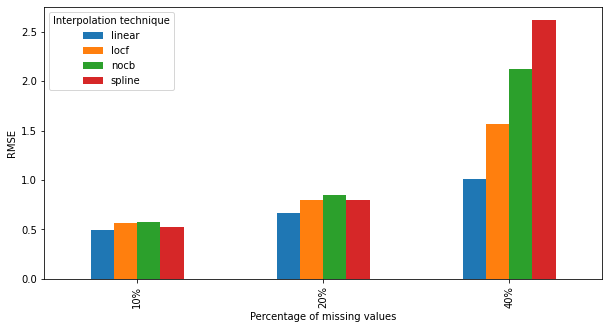

<IPython.core.display.Javascript object>

In [34]:
import matplotlib.pyplot as plt
import numpy as np

df = pd.DataFrame(
    [
        ["linear", "10%", mse_linear_10],
        ["spline", "10%", mse_spline_10],
        ["locf", "10%", mse_locf_10],
        ["nocb", "10%", mse_nocb_10],
        ["linear", "20%", mse_linear_20],
        ["spline", "20%", mse_spline_20],
        ["locf", "20%", mse_locf_20],
        ["nocb", "20%", mse_nocb_20],
        ["linear", "40%", mse_linear_40],
        ["spline", "40%", mse_spline_40],
        ["locf", "40%", mse_locf_40],
        ["nocb", "40%", mse_nocb_40],
    ],
    columns=["Interpolation technique", "Percentage of missing values", "RMSE"],
)
ax = df.pivot("Percentage of missing values", "Interpolation technique", "RMSE").plot(
    kind="bar", figsize=(10, 5), ylabel="RMSE"
)
fig = ax.get_figure()
fig.savefig("RMSE_interpolation.png")

In [18]:
data[0]

[0.4929198566663836, 0.528453493502756, 0.5683569995313548, 0.5727238929518256]